# Saving prepared data to Google Cloud Storage bucket

### Dependencies

#### Before running this notebook, please make sure you have already installed the following libraries with correct versions.

- numpy==1.21.6
- opencv-python==4.7.0.72
- tensorboard==2.11.2

## Imports

In [2]:
import numpy as np
import glob
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

## download "The Oxford-IIIT Pet Dataset" from - https://www.robots.ox.ac.uk/~vgg/data/pets/

In [2]:
!wget https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz

--2023-03-04 18:27:17--  https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19173078 (18M) [application/octet-stream]
Saving to: ‘annotations.tar.gz.1’

annotations.tar.gz. 100%[===================>]  18.28M  9.12MB/s    in 2.0s    

2023-03-04 18:27:20 (9.12 MB/s) - ‘annotations.tar.gz.1’ saved [19173078/19173078]



In [8]:
!wget https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz

--2023-03-04 04:31:34--  https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/octet-stream]
Saving to: ‘images.tar.gz’

images.tar.gz       100%[===================>] 755.23M  18.6MB/s    in 47s     

2023-03-04 04:32:22 (16.0 MB/s) - ‘images.tar.gz’ saved [791918971/791918971]



### create a data folder and extract images into it

In [9]:
!mkdir data
!tar -xf images.tar.gz -C data
!mkdir labels
!tar -xf annotations.tar.gz -C labels

## Inspecting Data

In [3]:
all_image_files = glob.glob("data/images/*.jpg")
print("Total number of image files : ", len(all_image_files))

Total number of image files :  7390


### check dimensions of few images

In [4]:
for image_path in np.random.choice(all_image_files, size=5):
    img = cv2.imread(image_path)
    print(img.shape)

(270, 360, 3)
(375, 500, 3)
(333, 500, 3)
(333, 500, 3)
(335, 500, 3)


## checkout labels

### check few image file paths (pet breed/class is hidden in image names)

In [5]:
all_image_files[:5]

['data/images/basset_hound_51.jpg',
 'data/images/beagle_179.jpg',
 'data/images/Persian_4.jpg',
 'data/images/scottish_terrier_64.jpg',
 'data/images/Russian_Blue_128.jpg']

### visualizing some image samples

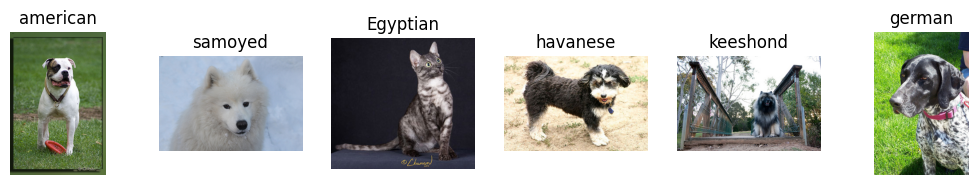

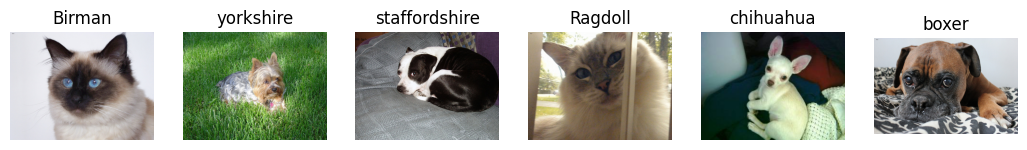

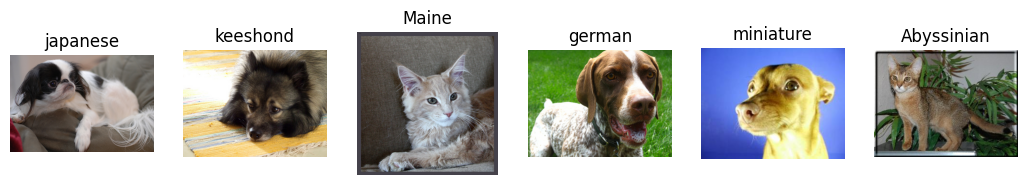

In [5]:
for i in range(3):
    plt.figure(figsize=(13, 13))
    for j in range(6):
        img_path = np.random.choice(all_image_files)
        img = cv2.imread(img_path)
        img_class = img_path.split("/")[-1].split("_")[0]
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(660 + 1 + j)
        plt.imshow(img)
        plt.axis('off')
        plt.title(img_class)
    plt.show()

## Train/Validation/Test split

### lets keep 60% for train, 20% for validation and rest 20% for test. 

In [6]:
train_files = all_image_files[:int(len(all_image_files)*0.6)]
validation_files = all_image_files[int(len(all_image_files)*0.6):int(len(all_image_files)*0.8)]
test_files = all_image_files[int(len(all_image_files)*0.8):]
print(len(train_files), len(validation_files), len(test_files))

4434 1478 1478


## Prepare data for model (read and convert all images to same size)

### input images will be black-n-white, and model will fill colors

### lets bring all images to size (80 x 80) resolution

In [7]:
train_x = []
train_y = []
val_x = []
val_y = []
test_x = []
test_y = []

for file in train_files:
    try:
        img = cv2.imread(file)
        img = cv2.resize(img, (80,80))
        color_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        black_n_white_img = cv2.cvtColor(color_img, cv2.COLOR_RGB2GRAY)
    except:
        continue
    train_x.append((black_n_white_img-127.5)/127.5)
    train_y.append((color_img-127.5)/127.5)
    
for file in validation_files:
    try:
        img = cv2.imread(file)
        img = cv2.resize(img, (80,80))
        color_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        black_n_white_img = cv2.cvtColor(color_img, cv2.COLOR_RGB2GRAY)
    except:
        continue
    val_x.append((black_n_white_img-127.5)/127.5)
    val_y.append((color_img-127.5)/127.5)
    
for file in test_files:
    try:
        img = cv2.imread(file)
        img = cv2.resize(img, (80,80))
        color_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        black_n_white_img = cv2.cvtColor(color_img, cv2.COLOR_RGB2GRAY)
    except:
        continue
    test_x.append((black_n_white_img-127.5)/127.5)
    test_y.append((color_img-127.5)/127.5)

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


### check input/output pairs

Input Samples (black and white): 


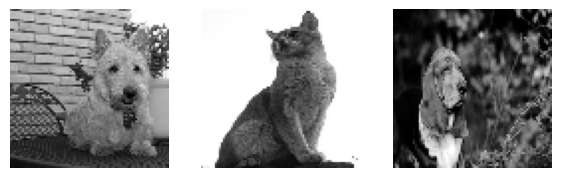

Output Samples (colored): 


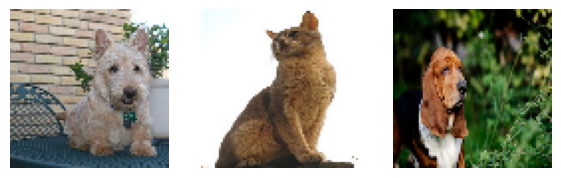

In [29]:
# input images
indexes = np.random.choice(range(0,4000), size=3)

print("Input Samples (black and white): ")
plt.figure(figsize=(7,7))
for i in range(3):
    plt.subplot(330+1+i)
    plt.imshow((train_x[indexes[i]]+1.0)/2.0, cmap='gray')
    plt.axis('off')
plt.show()

# corresponding output images
print("Output Samples (colored): ")
plt.figure(figsize=(7,7))
for i in range(3):
    plt.subplot(330+1+i)
    plt.imshow((train_y[indexes[i]]+1.0)/2.0)
    plt.axis('off')
plt.show()

### convert image list into numpy arrays

In [8]:
train_x = np.expand_dims(np.array(train_x),-1)
val_x = np.expand_dims(np.array(val_x),-1)
test_x = np.expand_dims(np.array(test_x),-1)

train_y = np.array(train_y)
val_y = np.array(val_y)
test_y = np.array(test_y)

In [9]:
print(train_x.shape, train_y.shape, val_x.shape, val_y.shape, test_x.shape, test_y.shape)

(4430, 80, 80, 1) (4430, 80, 80, 3) (1478, 80, 80, 1) (1478, 80, 80, 3) (1476, 80, 80, 1) (1476, 80, 80, 3)


## Save numpy arrays into GCS 

In [1]:
from io import BytesIO
import numpy as np
from tensorflow.python.lib.io import file_io

2023-04-17 15:10:56.770248: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-17 15:10:57.945518: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-04-17 15:10:57.945771: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/loca

### save

In [11]:
dest = 'gs://data-bucket-417812395597/' # Destination to save in GCS
## saving training data
np.save(file_io.FileIO(dest+'train_x', 'w'), train_x)
np.save(file_io.FileIO(dest+'train_y', 'w'), train_y)

## saving validation data
np.save(file_io.FileIO(dest+'val_x', 'w'), val_x)
np.save(file_io.FileIO(dest+'val_y', 'w'), val_y)

## saving test data
np.save(file_io.FileIO(dest+'test_x', 'w'), test_x)
np.save(file_io.FileIO(dest+'test_y', 'w'), test_y)

### load and verify

In [12]:
dummy_load = BytesIO(file_io.read_file_to_string(dest+'train_x', binary_mode=True))
dummy_train_x = np.load(dummy_load)

In [13]:
dummy_train_x.shape

(4430, 80, 80, 1)

In [14]:
train_x = np.load(BytesIO(file_io.read_file_to_string(dest+'train_x', binary_mode=True)))
train_y = np.load(BytesIO(file_io.read_file_to_string(dest+'train_y', binary_mode=True)))
val_x = np.load(BytesIO(file_io.read_file_to_string(dest+'val_x', binary_mode=True)))
val_y = np.load(BytesIO(file_io.read_file_to_string(dest+'val_y', binary_mode=True)))
test_x = np.load(BytesIO(file_io.read_file_to_string(dest+'test_x', binary_mode=True)))
test_y = np.load(BytesIO(file_io.read_file_to_string(dest+'test_y', binary_mode=True)))

In [15]:
print(train_x.shape, train_y.shape, val_x.shape, val_y.shape, test_x.shape, test_y.shape)

(4430, 80, 80, 1) (4430, 80, 80, 3) (1478, 80, 80, 1) (1478, 80, 80, 3) (1476, 80, 80, 1) (1476, 80, 80, 3)
